# Exploratory Data Analysis

Data consist of two major parts - tabular data and image data.

## Loading Tabular Data

In [2]:
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


TRAIN_ANNDATA_PATH = "train/cell_data.h5ad"

Tabular data consist of three parts: </br>
* `obs` - includes (CHYBA) technical informations about images and cell type for each cell.
* `var` - includes markers names.
* `layers` - inludes markers expression data in the form of an array.

In [3]:
train_anndata = anndata.read_h5ad(TRAIN_ANNDATA_PATH)

In [4]:
train_anndata.obs.head()

,image,sample_id,ObjectNumber,Pos_X,Pos_Y,area,major_axis_length,minor_axis_length,eccentricity,width_px,...,flag_tumor,PD1_pos,Ki67_pos,cleavedPARP_pos,GrzB_pos,tumor_patches,distToCells,CD20_patches,Batch,cell_labels
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,1.0,300.846154,0.692308,13.0,6.094800,2.780135,0.889904,600.0,...,0,0,0,0,0,1,8.773580,,Batch20191023,MacCD163
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_3,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,3.0,26.982143,0.928571,56.0,21.520654,3.368407,0.987675,600.0,...,0,0,0,0,0,0,72.247393,,Batch20191023,Mural
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_5,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,5.0,309.083333,0.750000,12.0,5.294329,2.862220,0.841267,600.0,...,0,0,0,0,0,1,16.982199,,Batch20191023,DC
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_7,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,7.0,431.916667,0.750000,12.0,5.294329,2.862220,0.841267,600.0,...,0,0,0,0,0,1,-8.314676,,Batch20191023,Tumor
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_8,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,8.0,116.931034,1.206897,29.0,9.216670,4.112503,0.894932,600.0,...,0,0,0,0,0,1,-15.358007,,Batch20191023,Tumor


In [5]:
train_anndata.var.head()

,channel,use_channel,marker
0,Y89,1,MPO
1,In113,0,HistoneH3
2,In115,1,SMA
3,Pr141,1,CD16
4,Nd142,1,CD38


In [6]:
exprs_matrix = train_anndata.layers["exprs"]
exprs_matrix

array([[0.        , 1.81998789, 0.50264976, ..., 0.42427316, 4.76113044,
        5.30135121],
       [0.13592021, 2.39308671, 1.1369607 , ..., 0.1186204 , 5.02924127,
        5.53076447],
       [0.16590455, 2.24491655, 1.39633367, ..., 0.01514088, 4.41838981,
        4.81592274],
       ...,
       [0.11088375, 3.52028872, 0.31083376, ..., 0.10251545, 4.30306951,
        4.82609754],
       [0.15094134, 4.2149584 , 2.65164581, ..., 0.08397474, 4.8224562 ,
        5.36166154],
       [0.49059059, 5.8223478 , 1.61541043, ..., 0.22942113, 4.44821169,
        5.01081325]])

To train baseline models only expression data will be used, so it will be transfomed to handy DataFrame object:

In [7]:
# Cell types
labels = list(train_anndata.obs.iloc[:, -1])

# Marker names
markers_names = list(train_anndata.var["marker"])

# Creating expression DataFrame
df = pd.DataFrame(exprs_matrix)
df.columns = markers_names

# Adding labels column
df["label"] = labels

In [8]:
df.head()

,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,CD15,CD45RA,CD163,...,CD40,CD4,CD14,Ecad,CD303,CD206,cleavedPARP,DNA1,DNA2,label
0,0.000000,1.819988,0.502650,1.265410,0.515007,3.331261,0.403800,0.455421,0.528734,2.948392,...,0.567238,1.651610,2.556218,0.777378,0.000000,3.581082,0.424273,4.761130,5.301351,MacCD163
1,0.135920,2.393087,1.136961,0.505529,0.605836,0.710857,0.419814,0.100110,0.743002,0.329851,...,0.603468,1.358368,1.700181,1.884778,0.068872,0.744634,0.118620,5.029241,5.530764,Mural
2,0.165905,2.244917,1.396334,1.744382,0.458541,4.006500,0.003607,0.562882,1.236516,1.747839,...,0.812795,1.949510,3.465199,1.743507,0.403610,2.244398,0.015141,4.418390,4.815923,DC
3,0.165905,1.144778,0.563216,1.166010,0.513735,2.034705,0.650242,0.250150,1.205007,0.990385,...,1.228290,2.287524,2.491710,2.268924,0.196199,0.946492,0.233095,3.736089,4.368012,Tumor
4,0.137497,2.210970,0.892371,0.497646,0.412840,1.499184,0.098131,0.208566,0.922874,1.255892,...,0.360098,1.445085,2.332546,2.387292,0.061568,1.632904,0.372278,4.607359,5.152041,Tumor


# Visualizations

## Histograms of markers expression

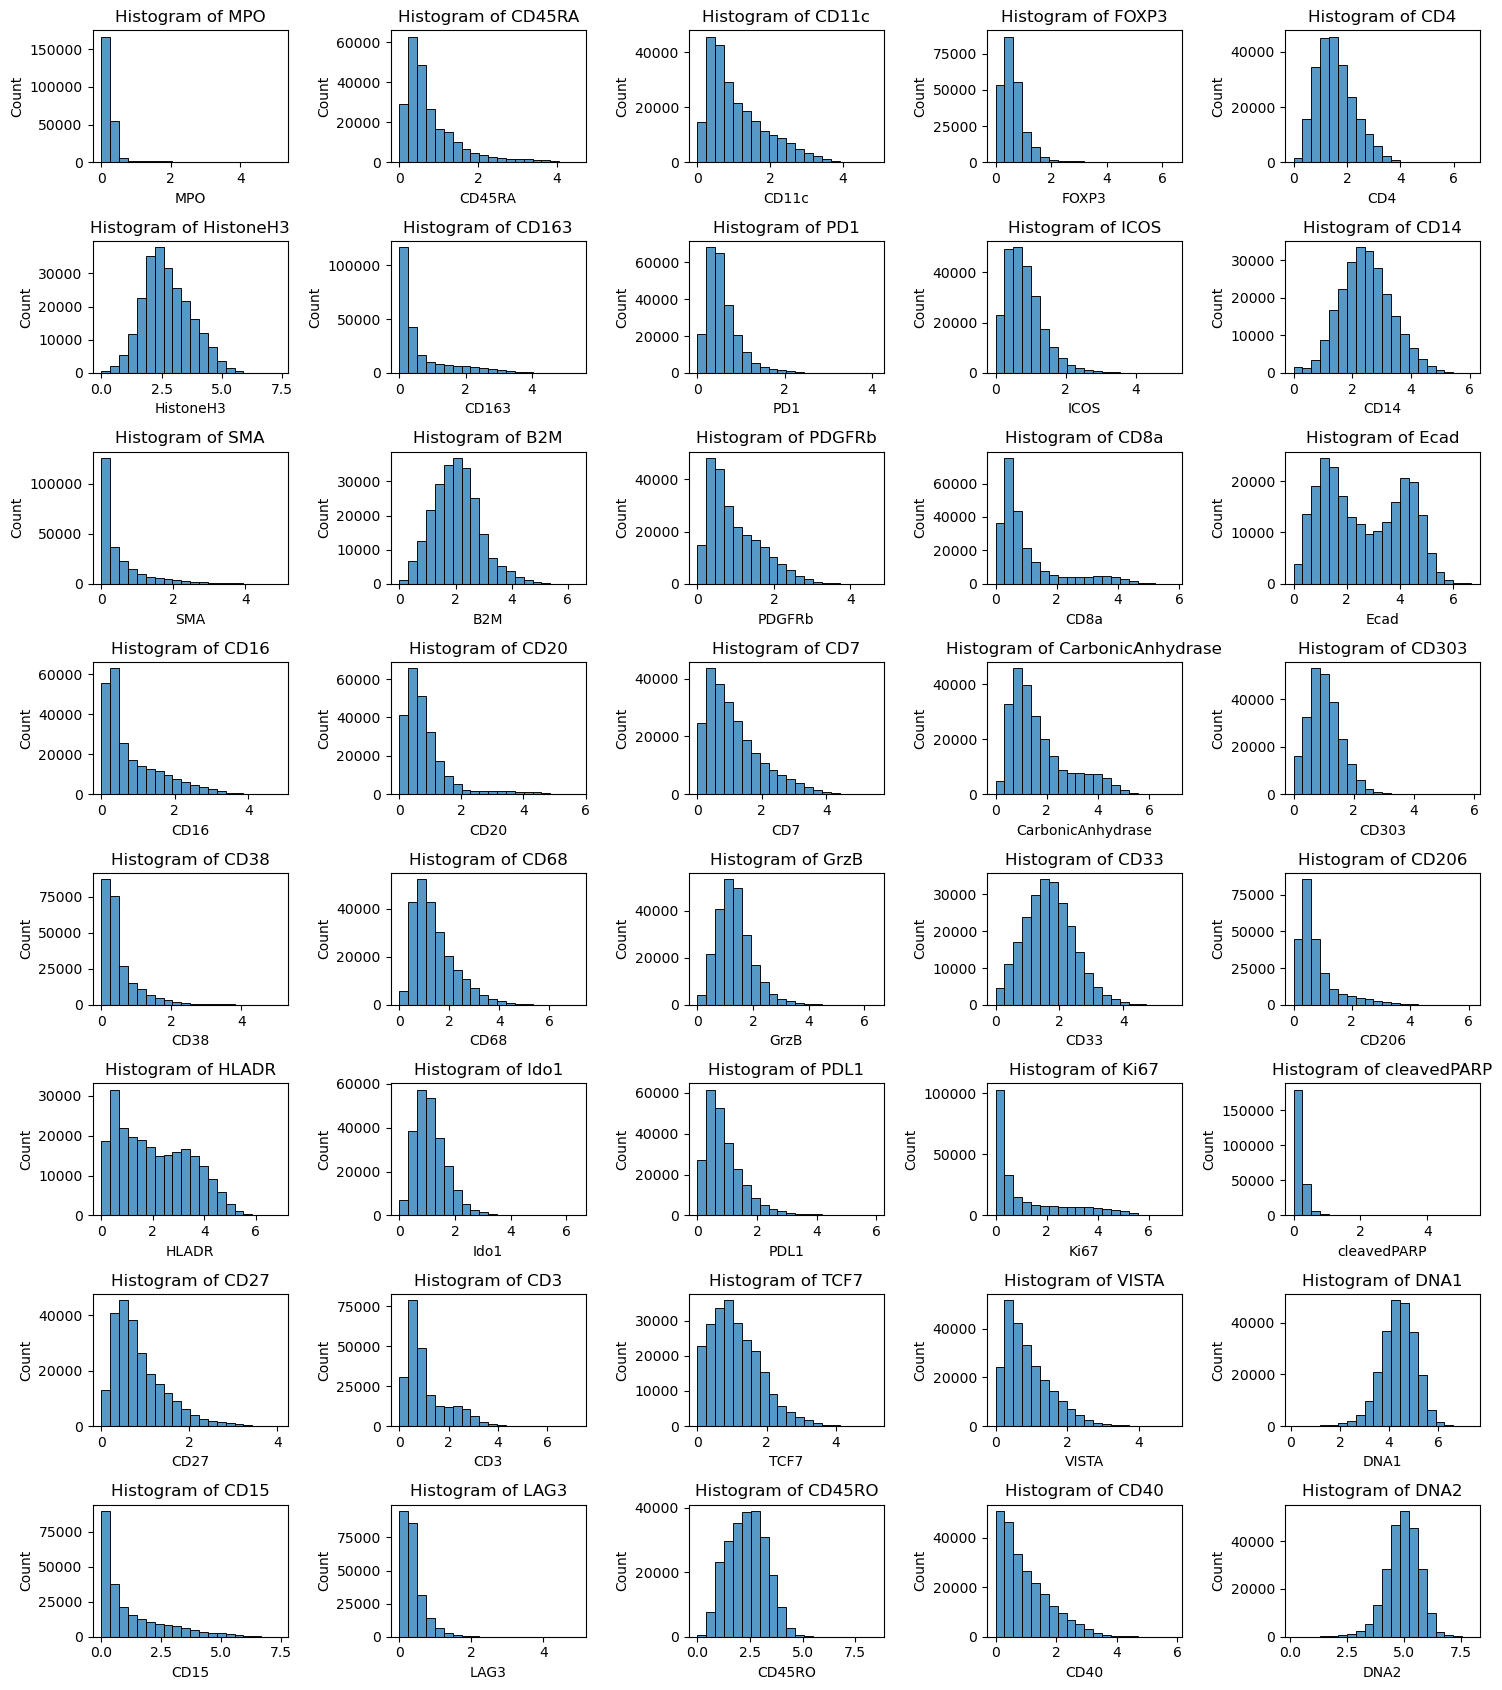

In [41]:
fig, axes = plt.subplots(8,5, figsize=(15,17))
k=0
for i in range(5):
    for j in range(8):
        sns.histplot(data=df, x=markers_names[k], bins=20, ax=axes[j,i])
        axes[j,i].set_title("Histogram of {}".format(markers_names[k]))
        k+=1
fig.tight_layout()

## Cell type counts

Text(0.5, 1.0, 'Counts of cell types')

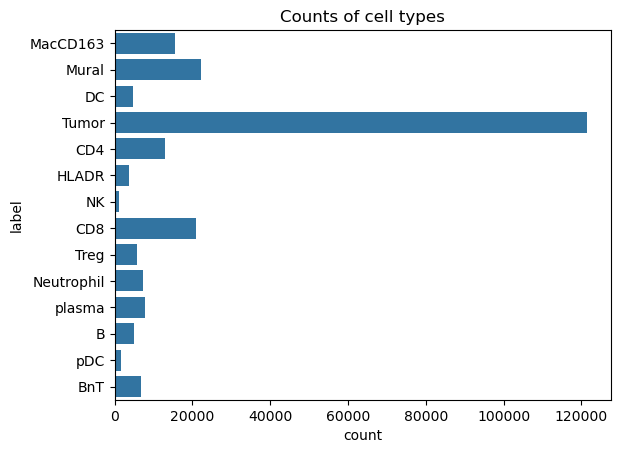

In [47]:
sns.countplot(df['label'])
plt.title("Counts of cell types") 

## Correlations between markers and cell types

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["label"])
df["label"] = le.transform(df["label"])

In [10]:
corelationMatrix = df.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

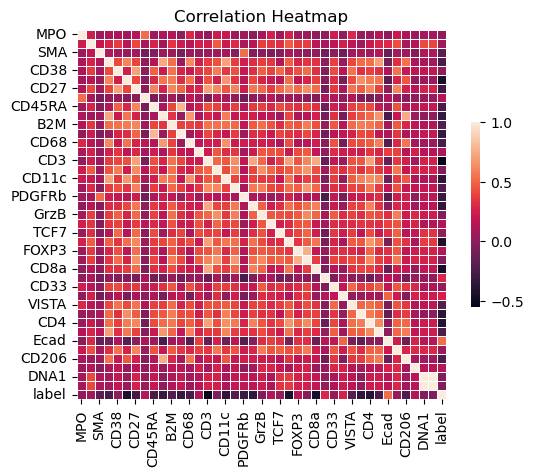

In [11]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corelationMatrix, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')

In [ ]:
graph = sns.PairGrid(df.iloc[:1000, :], hue="label")
graph.map_diag(sns.histplot)
graph.map_offdiag(sns.scatterplot)
graph.add_legend()